In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10

(-1, 11)

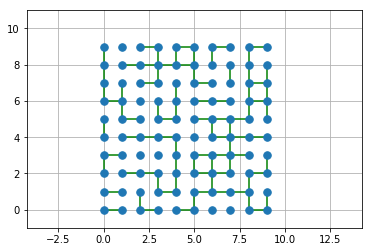

In [21]:
# Goal: solve fences puzzles with integer program ( we'd like to find methods and patterns of solution)
# 
# Possible resources (COIN-OR) or possibly (integer programming with textbook of conforti)
# the variables are the state of each edge.  

M = 10
N = 10

pt = [[a,b] for a in range(M) for b in range(N)]

pt = np.array(pt)

# these edges might not be independent or random
edge = [ [a,b,a+1,b]  for a in range(M-1) for b in range(N) if np.random.random() > 0.5 ] 
# how do we find the "connected" components in this graph?
for e in edge:
    plt.plot( [e[0],e[2]] , [e[1],e[3]] , 'g-' )
edge = [ [a,b,a,b+1]  for a in range(M) for b in range(N-1) if np.random.random() > 0.5 ] 
for e in edge:
    plt.plot( [e[0],e[2]] , [e[1],e[3]] , 'g-' )

plt.plot( pt[:,0] , pt[:,1] , '.' , markersize=15)
plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,M+1])
plt.ylim([-1,M+1])

(-1, 11)

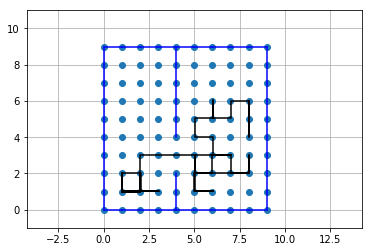

In [46]:
# how to get a single closed loop?

M = 10
N = 10

pt = [[a,b] for a in range(M) for b in range(N)]

pt = np.array(pt)
plt.plot( pt[:,0] , pt[:,1] , '.' , markersize=12)



wall  = [ (0,n) for n in range(10)] + [(n,0) for n in range(10)] + [(4,n) for n in range(10) if n != 3]
wall += [ (9,n) for n in range(10)] + [(n,9) for n in range(10)]

for n in range(9):
    plt.plot( [0,0] , [n,n+1], 'b-')
    plt.plot( [9,9], [n,n+1], 'b-')
    plt.plot( [n,n+1],[0,0], 'b-')
    plt.plot( [n,n+1],[9,9], 'b-')
    
    if n not in [2,3]:
        plt.plot( [4,4], [n, n+1], 'b-')

# our data type "edge" should equation [a,b,c,d] and [c,d,a,b]

a,b = 1,1

x,y = a,b

path = [(x,y)]

for t in range(100):
    c = int(4*np.random.random())
    
    if c == 0:
        if (a-1,b) not in wall:
            a -= 1
            x  = a + 0.05*np.random.random()
    elif c == 1:
        if (a+1,b) not in wall:
            a += 1
            x  = a + 0.05*np.random.random()
    elif c == 2:
        if (a,b-1) not in wall:
            b -= 1
            y  = b + 0.05*np.random.random()
    elif c == 3:
        if (a,b+1) not in wall:
            b += 1
            y  = b + 0.05*np.random.random()
    else:
        pass
    path += [[x,y]]

plt.plot( [pt[0] for pt in path], [pt[1] for pt in path], 'k-' )


plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,M+1])
plt.ylim([-1,M+1])

In [67]:
# how to get a single closed loop?

def getPath():

    M = 10
    N = 10

    pt = [[a,b] for a in range(M) for b in range(N)]

    pt = np.array(pt)




    wall  = [ (0,n) for n in range(10)] + [(n,0) for n in range(10)] + [(4,n) for n in range(10) if n != 3]
    wall += [ (9,n) for n in range(10)] + [(n,9) for n in range(10)]



    # our data type "edge" should equation [a,b,c,d] and [c,d,a,b]

    a,b = 1,1

    x,y = a,b

    path = [(x,y)]

    for t in range(100):
        c = int(4*np.random.random())

        if c == 0:
            if (a-1,b) not in wall:
                a -= 1
                x  = a + 0.05*np.random.random()
        elif c == 1:
            if (a+1,b) not in wall:
                a += 1
                x  = a + 0.05*np.random.random()
        elif c == 2:
            if (a,b-1) not in wall:
                b -= 1
                y  = b + 0.05*np.random.random()
        elif c == 3:
            if (a,b+1) not in wall:
                b += 1
                y  = b + 0.05*np.random.random()
        else:
            pass
        path += [[x,y]]
        
    return path



(-1, 50)

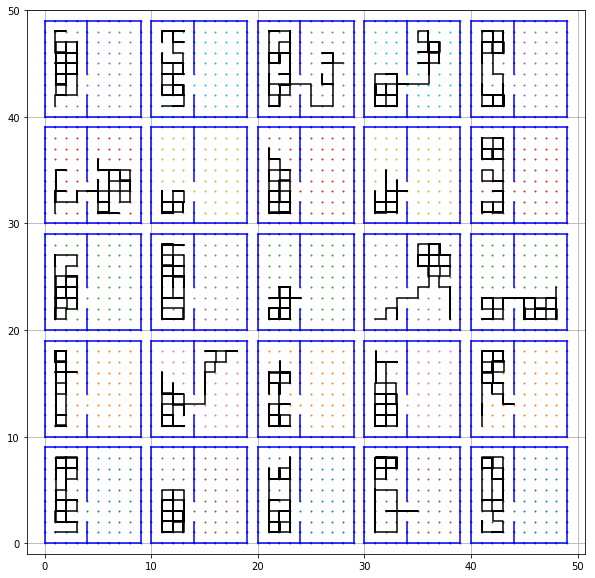

In [68]:
for s in range(5):
    for t in range(5):

        path = getPath()

        plt.plot( pt[:,0] + 10*s , pt[:,1] + 10*t , '.' , markersize=2)


        for n in range(9): 
            plt.plot( [0+10*s,  0+10*s]  , [n+10*t,n+1+10*t], 'b-')
            plt.plot( [9+10*s,  9+10*s]  , [n+10*t,n+1+10*t], 'b-')
            plt.plot( [n+10*s,n+1+10*s]  , [0+10*t,0+10*t]  , 'b-')
            plt.plot( [n+10*s,n+1+10*s]  , [9+10*t,9+10*t]  , 'b-')

            if n not in [2,3]:
                plt.plot( [4+10*s,4+10*s], [n+10*t, n+1+10*t], 'b-')

        plt.plot( [pt[0] + 10*s for pt in path], [pt[1]+ 10*t for pt in path], 'k-' )


plt.axis("Equal")
plt.grid(True)
plt.xlim([-1,5*M])
plt.ylim([-1,5*M])